## Introduction
There are many situations where we are interested in outputting a discrete response based on our observations. For example,
health condition, win/lose, eye color. In these situations, it does not make sense
to model the response as a linear function of the observations (as we did in the linear regression notebook). Using
Logistic regression is more appropriate for these problems. Logistic regression models the response variable
as the conditional probability given the observations. A probability is a value ranging from 0 to 1,
which represents how likely an event is to occur. In this notebook, we will go over the theory behind
logistic regression. Furthermore, we will apply it on the
[Social Network Ads](https://www.kaggle.com/rakeshrau/social-network-ads) dataset to determine
whether a person purchased a particular product given their age, gender, and estimated salary.

## Why logistic regression?
We know that linear regression could be used in classification problems.
So what is the need for logistic regression in this case? <br>

#### Ordinal response
 Suppose that we are trying to classify vegetables based on their description
 into one of 3 classes: tomato, onion, carrot. In order for us to apply linear regression,
  we will have to encode these classes into a quantitative response variable where:
 <center>
 Y = \begin{cases}
       1     & \text{ if tomato} \\
       2     & \text{ if onion} \\
       3     & \text{ if carrot} \\
     \end{cases}
 </center>
 By doing this, we made an assumption about our response classes that
 may or may not be true. We assumed that the difference between an onion
 and a tomato is the same as an onion and a carrot, <b>implying that our response is ordinal</b>.
 <br>

#### Continuous response
 In classification problems, we are trying to constrain the response
 to a set of discrete values. Unfortunately, that is not possible with linear regression since
 it has a range $(-\infty,\infty)$. Meanwhile, logistic regression restricts
  the response variable to $(0,1)$, which can be seen as the probability
  of our observation belonging to a specific class $P(y_{j}=1|x_{i})$.
<br><br>![linear vs logistic](https://i.stack.imgur.com/rhVmk.jpg)

## Assumptions
There are some assumptions we need to make about the data in order for us to be able
to use logistic regression on it. Some of these assumptions are unique to logistic regression,
and some are common between all regression models. These assumptions are:

#### Appropriate outcome
Binary logistic regression requires a dichotomous (binary)
response variable and accordingly, ordinal and multinomial logistic regression require ordinal
and multinomial responses respectively.

#### Linear log-odds (logit)
For linear regression the assumption is that the response variable has a linear relationship
with the explanatory variables, but this is not possible in logistic regression since the output
is a probability. Instead logistic regression requires the explanatory variables to have a linear
relationship with with the logit $\frac{\hat y}{1 - \hat y}$.

#### Independent observations/errors
the observations should not come from repeated measurements or matched data.
If the observations are not independent it means that logistic regression produces great variability
effects.

#### Absence of multicollinearity
Multicollinearity occurs when independent variables in a regression model are correlated.
Since the goal of regression analysis is to separate the individual effects of independent variables
on the response, this can lead to misleading standard errors and in turn, incorrect statistical significance.
Multicollinearity can in some cases hinder the model's ability to learn, but in most cases it does not.
Thus, it is less of an issue in predictions compared to inference.

#### Large sample size
Maximum likelihood estimation requires a large sample size
in order for it to converge to the estimates. There is no consensus
how we choose the sample size, but as a rule of thumb, the minimum number of
cases per variable should be 10.

## Model
Given a matrix $X \in R^{m\times n}$, where each of the $m$ rows represents
an observation, and each of the $n$ columns represents the values of a feature, binary
logistic regression tries to predict the values in the vector $Y \in R^{m}$
which is either 0 or 1. Our goal is to map our features into probabilities
 with range $[0,1]$, while maintaining continuity and differentiability.<br><br>

In linear regression, we modeled our response using:<br>
 $$\begin{align} Y = \beta^TX \end{align}$$<br>
In logistic regression we will have to transform this response to get the desired range.
A suitable function for such transformation is the logistic function: <br>
$$ f(x) = \frac{L} {1 + e^{-k(x-x_0)}}$$,<br> where <br>
$x_0=$ the midpoint of the curve <br>
$L =$ the maximum value of the curve <br>
$k =$ steepness of the curve <br><br>
By setting $L = 1, x_0 = 0, k = 1$, we get a function with maximum value of 1
and a y-intercept at $x = 0$: <br>
$$Y = \frac{1}{1 + e^{-x}}$$<br>
substituting $x$ with our regression line we get:<br>
$$P(X) = \frac{1}{1 + e^{-(\beta^TX)}}$$<br>
As we mentioned before, one of the logistic regression assumptions
is that the relationship between the predictors and the log odds(logit)
 of the response is linear. Odds are the ratio of the chance of some event
 happening to the chance that it does not. With some manipulation, we see that:<br>
 $$\frac{P(X)}{1 - P(X)} = e^{\beta^TX}$$<br>
 taking the natural logarithm on both sides we get the log-odds (logit):<br>

 $$ln(\frac{P(X)}{1 - P(X)}) = \beta^TX$$<br>
The log odds of our response is in fact linear.

## Error Function
For us to find the optimal values for the weights $\beta$, we have to
devise an error function that will tell us the inaccuracies created by our weights $\beta$.
Using OLS for logistic regression leads to poor results due to the gradient vanishing the closer
we get to 0, thus hurting our performance. Additionally, in the case of logistic regression OLS
becomes non-convex. Therefore, we will use the likelihood function to measure our error.<br><br>

Binary Logistic regression assumes the response variable to follow a bernoulli distribution,
which is a special case of the binomial distribution. since each of our observations has a different probability of success,
 we can treat the probability of each data point as a Bernoulli random variable:<br>
$$P(Y = y | X = x) = p^k(1-p)^{1-k}$$<br>
Furthermore, we notice that $k$ corresponds to
the true label of a specific observation $y$, and that $P$ is our predicted value $\hat y$.
This gives us a neat final form for the probability of one data point:<br>
$$P(Y = y | X = x) = \hat y^y(1-\hat y)^{1-y}$$<br>
We would now like to find the likelihood that we observe the response vector $Y$ given the matrix $X$ and our model parameters $\beta$. To achieve this,
we simply take the joint probability of all the data points:<br>
$$L(Y|X;\beta) = \prod_{i = 1}^m \hat y^{y^{(i)}}(1-\hat y)^{1-y^{(i)}}$$<br>
Notice that we calculated the joint probability by
simply taking the product. This is due to the assumption we made
that the observations are independent from each other. This
is also an assumption in OLS linear regression considering the fact that OLS is the
maximum likelihood for gaussian distributions.<br><br>

Using the likelihood as an error function has two considerable drawbacks. The first being the numerical
instability caused by multiplying many small probabilities together. And
the other being a difficult to compute gradient. Computing the derivative
of a product of terms of arbitrary length is not feasible. Fortunately,
taking the log of the likelihood function solves both of these issues. Furthermore,
the log function is monotonically increasing, which means that maximizing the log-likelihood
is the same as maximizing the likelihood.<br>
$$log(L(\beta)) = \sum_{i = 1}^m  y^{(i)}log(\hat y)+(1-y^{(i)})log(1-\hat y)$$<br>

The log-likelihood function is a concave function. It reaches a global maximum
at the value of population parameters that best explain our data, and it
keeps decreasing the farther we deviate from these parameter values.<br><br>

Unlike OLS, it is not mathematically possible to find a closed form for the
parameters that minimize our error. This is attributed to the fact that the
first order derivative of the log-likelihood function w.r.t $\beta$ is non-linear and
cannot be expressed as a finite sequence of algebraic operations.
For this reason, we will have to use gradient based approximation methods such as gradient ascent,
or the newton-raphson method to approximate the $\beta$ values that maximize
the log-likelihood (and in turn minimize the error).

##  Newton-raphson approximation

Before explaining the newton-raphson method, we first have to go over taylor series. We can express
a function as an infinite sum of polynomials in terms of its derivatives around point $a$ given that the function is infinitely
differentiable at that point.<br>

\begin{equation}
\begin{split}
f(x) = f(a) + f^{'}(a)(x - a) + \frac{f^{''}(a)(x - a)^2}{2!} + \frac{f^{'''}(a)(x - a)^3}{3!} +...= \sum_{n = 0}^\infty \frac{f^{(n)}(a)(x - a)^n}{n!}
\end{split}
\end{equation}<br>

Newton-raphson tries to approximate the point $x$ at which we know the value of the function $f(x)$.
To do this, we take the first two terms in the taylor series and solve for $x$.
Consequently, it is a linear approximation method.<br><br>

In the case of logistic regression, we are trying to find the values of $\beta$ that make the first order
derivative of the log-likelihood 0 (the maxima). Therefore in this case, it is a quadratic approximation of
the log-likelihod, and a linear approximation of its derivative.<br>
$$x  =  a - \frac{f^{'}(a)}{f^{''}(a)}$$<br>
In higher dimensions, the matrix of first order partial derivatives is called the jacobian matrix ($\nabla f(x) = J_f$), and the matrix
of second order partial derivatives is called the hessian ($H_f$). If we start at a random $x_t$, we can calculate $x_{t+1}$ by
using $x_t$ as $a$. The new $x$ will be closer to the actual value of $x$ as long as we are withing the range of convergence.
Hence, we can approximate $\beta$ as follows:<br>
$$\beta_{t+1}  =  \beta_{t} - H_f(\beta_{t})^{-1}J_f(\beta_{t})$$<br>
Let us start by calculating the gradient w.r.t the weight vector $\beta$<br>

\begin{align*}
\frac{\partial}{\partial\beta} log(L(\beta)) = \sum_{i = 1}^m \frac{\partial}{\partial\beta}
y^{(i)}log(\hat y^{(i)})+ \sum_{i = 1}^m \frac{\partial}{\partial\beta} (1-y^{(i)})log(1-\hat y^{(i)})
\end{align*}<br>

we will then find the derivative for each non-constant part of the sum.
starting by $log(\hat y)$:<br>

\begin{align*}
\frac{\partial}{\partial\beta} log(\hat y) &=
\frac{\partial}{\partial\beta} log(\frac{1}{1 + e^{-\beta^Tx}}) \\
 &= - \frac{\partial}{\partial\beta} log(1 + e^{-\beta^Tx}) \\
 &= \frac{xe^{-\beta^Tx}}{1 + e^{-\beta^Tx}} \\
 &= x (1 - \hat y)
\end{align*}<br>

Then, the derivative of $log(1-\hat y)$:<br>

\begin{align*}
\frac{\partial}{\partial\beta} log(1-\hat y) &=
\frac{\partial}{\partial\beta} log(\frac{e^{-\beta^Tx}}{1 + e^{-\beta^Tx}}) \\
&= \frac{\partial}{\partial\beta} [log(e^{-\beta^Tx}) - log(1 + e^{-\beta^Tx})] \\
&= - x - \frac{\partial}{\partial\beta} log(1 + e^{-\beta^Tx}) \\
&= - x + x (1 - \hat y) \\
&= - x \hat y
\end{align*}<br>

By plugging our derivative values, we get the full derivative w.r.t $\beta$:<br>

\begin{align*}
&\sum_{i = 1}^m y^{(i)}x^{(i)} (1 - \hat y^{(i)}) - x^{(i)} \hat y^{(i)}(1-y^{(i)}) \\
&= \sum_{i = 1}^m x^{(i)}(y^{(i)} - y^{(i)}\hat y^{(i)} - \hat y^{(i)} + y^{(i)}\hat y^{(i)}) \\
&= \sum_{i = 1}^m x^{(i)}(y^{(i)} - \hat y^{(i)})
\end{align*}<br>

Generalizing this to get the gradient over $m$ observations, we find that:
$$J_f(\beta) = X^T(Y - \hat Y)$$<br>
Now that we have calculated the gradient, we need to calculate the hessian by taking the derivative
of the gradient w.r.t $\beta$:<br>

\begin{equation}
\frac{\partial}{\partial\beta} \sum_{i = 1}^m x^{(i)}(y^{(i)} - \hat y^{(i)})
= \sum_{i = 1}^m -x^{(i)}\frac{\partial}{\partial\beta} \hat y^{(i)}
\end{equation}<br>
We can calculate the derivative of $\hat y^{(i)}$ from the derivative of
$log(\hat y^{(i)})$ that we calculated previously:<br>

\begin{align*}
\frac{\partial}{\partial\beta} log(\hat y) &= \frac{1}{\hat y} \frac{\partial \hat y}{\partial\beta} \\
\frac{\partial \hat y}{\partial\beta} &= \hat y \frac{\partial}{\partial\beta} log(\hat y) \\
&= x \hat y (1 - \hat y)
\end{align*}<br>
Plugging the above value into the equation:<br>
\begin{equation}
\frac{\partial^2}{\partial\beta^2} log(L(\beta)) = -\sum_{i = 1}^m x^{(i)}x^{(i)} \hat y^{(i)} (1 - \hat y^{(i)})
\end{equation}<br>
Using the above equation, we can derive the vector form of the hessian matrix as:<br>
$$H_f(\beta) = -X^Tdiag(\hat Y(1 - \hat Y))X$$<br><br>

Earlier, we made the claim that the log-likelihood function is concave,
we can check this claim by applying the second derivative test using the hessian. In order for
a function to be concave, the hessian has to be negative definite, or negative semi-definite
at the maximum point $a$.
By inspecting the form of our hessian we can see that the term $X^Tdiag(\hat Y(1 - \hat Y))X$ will
always be non-negative, since it is a dot product of a probability with range $[0,1]$ and
a squared term. By adding the negative sign, the expression becomes non-positive.
We can prove that our hessian $H$ is negative semi-definite as follows:<br><br>
Let $\delta$ be any vector where $\delta \in \mathbb{R}^n$,<br>
Our hessian $H_f(\beta)$ is a symmetric matrix $\mathbb{R}^{n \times n}$<br>

\begin{aligned}
\delta^T H_f(\beta)\delta &= -\delta^T Xdiag(\hat Y(1 - \hat Y))X^T \delta \\
&= -(\delta^T X)diag(\hat Y(1 - \hat Y))(\delta^TX)^T \\
&= -diag(\hat Y(1 - \hat Y))||\delta^TX||^2
\end{aligned}<br>

\begin{equation}
-diag(\hat Y(1 - \hat Y))||\delta^TX||^2\leq 0
\end{equation}<br>
additionally, this implies that the eigenvalues of $H$ are non-positive as well:<br>
Since, \begin{equation}
H_f(\beta)\delta = \lambda \delta
\end{equation}<br>

\begin{align*}
\delta^T H_f(\beta)\delta = -\delta^T\lambda\delta \\
= \lambda||\delta||^2
\end{align*}<br>

In order for the expression to become non-positive,
all of the real eigenvalues have to be non-positive as well:<br>
$$\lambda||\delta||^2 \leq 0 \hspace{0.3cm} $$ for $$ \lambda \leq 0$$<br>
We will verify the correctness of our proof later by making sure that all the eigenvalues
of the hessian at the maximum, are non-positive.
![negative (semi)definite](https://i.imgur.com/KvCucXS.png)
Furthermore, we can see from the figure that negative semi-definite matrices are
not strictly concave, which in turn means the there is no unique maxima for the
function.<br><br>
Finally, after substitution, the expression for a single iteration of the newton-raphson method becomes:<br>
$$\beta_{t+1}  =  \beta_{t} + (X^Tdiag(\hat Y(1 - \hat Y))X)^{-1}X^T(Y - \hat Y)$$<br>

## Application
Now that we know how logistic regression works, let's make some predictions!

Our data set consists of the gender, age, estimated salary of 400 individuals,
and whether or not they bought a particular product (our response).

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("Data/Social_Network_Ads.csv")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# separate response variable
Y = data["Purchased"]

# drop the response variable and id columns
data.drop(columns=["User ID", "Purchased"],inplace=True)

# replace gender with a dummy variable
data ["Gender"] = pd.Categorical(data["Gender"])
data ["Gender"] = data["Gender"].cat.codes

# 80% train, 20% test
X_train,X_test,Y_train,Y_test = train_test_split(data,Y,test_size=0.2,random_state=53)
X_train.head()

,Gender,Age,EstimatedSalary
281,1,35,61000
94,0,29,83000
73,0,33,113000
166,0,22,55000
360,1,43,129000


In [11]:
interceptTrain = np.ones((X_train.shape[0],1))
interceptTest = np.ones((X_test.shape[0],1))

# add a feature of 1s for the y-intercept
X_train = X_train.values.reshape(X_train.shape[0],-1)
X_train = np.concatenate((interceptTrain,X_train),axis=1)

X_test = X_test.values.reshape(X_test.shape[0],-1)
X_test = np.concatenate((interceptTest,X_test),axis=1)

# correct matrix shapes
Y_train = Y_train.values.reshape(Y_train.shape[0],-1)
Y_test = Y_test.values.reshape(Y_test.shape[0],-1)

Now that we have prepared our data we can start fitting our model

In [12]:
beta = np.zeros((X_train.shape[1],1))

# our threshold is 0.5
roundToInt = np.vectorize(lambda elem: 1 if elem >= 0.5 else 0)

# convergence indicator
absStep = 1

# iterate until beta converges
iterations = 0
while absStep > 1e-6:

    Y_hat = 1 / (1 + np.exp(-np.dot(X_train,beta)))

    ll = np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log(1 - Y_hat))
    accuracy = 1 - np.sum(np.abs(roundToInt(Y_hat) - Y_train))/Y_train.shape[0]
    print("iteration %d:"  %iterations)
    print("    log-likelihood = %f" %ll)
    print("    training accuracy = %f" %accuracy)

    jacobian = np.dot(X_train.T,(Y_train - Y_hat))
    hessian = -np.dot(np.dot(X_train.T, np.diagflat(Y_hat * (1 - Y_hat))), X_train)

    step = np.dot(np.linalg.inv(hessian), jacobian)
    absStep = np.sqrt(np.dot(step.T,step))

    beta = beta - step

    iterations += 1

iteration 0:
    log-likelihood = -221.807098
    training accuracy = 0.328125
iteration 1:
    log-likelihood = -124.770589
    training accuracy = 0.859375
iteration 2:
    log-likelihood = -107.597276
    training accuracy = 0.856250
iteration 3:
    log-likelihood = -103.602187
    training accuracy = 0.862500
iteration 4:
    log-likelihood = -103.229399
    training accuracy = 0.862500
iteration 5:
    log-likelihood = -103.224745
    training accuracy = 0.862500
iteration 6:
    log-likelihood = -103.224744
    training accuracy = 0.862500


Since our newton algorithm did converge on a value for $\beta$,
we can now verify that we found a maxima.

In [13]:
np.linalg.eigvalsh(hessian)

array([-1.95124898e+11, -1.43717458e+04, -8.53240751e+00, -3.82455908e-01])

As we can see, all of the above eigenvalues are indeed negative, confirming the
concavity of the log-likelihood, and that our $\beta$ is a maxima.

## Quality of fit
There are many ways to assess the fit of a logistic regression model, such as,
chi-squared, pseudo $R^2$, $ROC$ 
(Receiver Operating Characteristic) curves, etc.
below, we will measure how well our model is able to generalize, 
by predicting the test set. Moreover, we will take a look at the $ROC$
curve in order to determine the optimal cutoff threshold for our model.

Let us now calculate the model accuracy for the test set:

In [14]:
Y_hat = 1 / (1 + np.exp(-np.dot(X_test,beta)))
predictions_test = roundToInt(Y_hat)
accuracy = 1 - np.sum(np.abs(predictions_test - Y_test))/Y_test.shape[0]
print("test accuracy = %f" %accuracy)

test accuracy = 0.800000


As we can see, the model accuracy is not the best. This error is the result of a
violation of the assumptions of logistic regression. Which is very common
in real data.

Now let us inspect the confusion matrix of our model given a 0.5 threshold:

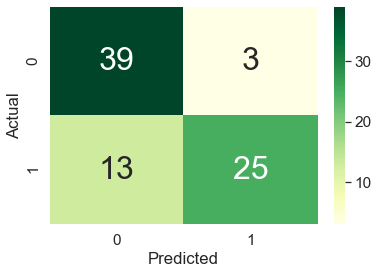

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

confusion = metrics.confusion_matrix(Y_test, predictions_test)
confusion_df = pd.DataFrame(confusion, range(2), range(2))
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_df,cmap="YlGn", annot=True, annot_kws={"size": 32})

plt.show()

Can we do better using a different cutoff threshold?
The $ROC$ curve has an answer. An $ROC$ curve plots the
rate of true positives against the rate of false positives
at various threshold values to get a sense of the accuracy
of our model. The diagonal line is a model that does
not discriminate between positives and negatives. Hence,
the equal rates of true positives and false positives. The
further the curve is from the diagonal line, the better the model
is at discriminating between positives and negatives. Therefore, we can take
the AUC (area under the curve) as a measure of how well a model discriminates.

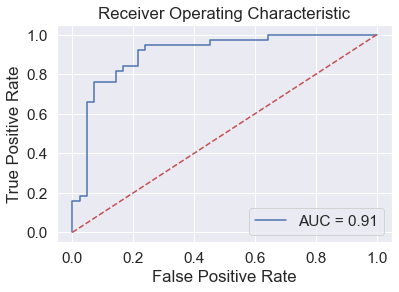

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_hat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

Given our data, true positives have the same importance as true negatives.
Thus, The optimal threshold is the one that gives us the maximum difference between the true positive rate and
the false positive rate for the test set.

In [17]:
tpr_fpr = tpr - fpr

tpr_fpr_df = pd.DataFrame({'threshold': thresholds,'tpr - fpr': tpr_fpr},)
tpr_fpr_df.sort_values(by='tpr - fpr',ascending=False,inplace=True,ignore_index=True)

tpr_fpr_df.style.hide_index()

threshold,tpr - fpr
0.220736,0.709273
0.271187,0.706767
0.462862,0.691729
0.226792,0.682957
0.337966,0.675439
0.355168,0.672932
0.348887,0.649123
0.290215,0.627820
0.410862,0.620301
0.510274,0.610276


As seen by the table above, $0.220736$ seems to be the optimal threshold.
Let us find out if using it improves our test accuracy.

In [18]:
roundToInt = np.vectorize(lambda elem: 1 if elem >= 0.220736 else 0)

predictions_test = roundToInt(Y_hat)
accuracy = 1 - np.sum(np.abs(predictions_test - Y_test))/Y_test.shape[0]
print("test accuracy = %f" %accuracy)

test accuracy = 0.850000


It looks like our test accuracy has increased, but let us look at the
new confusion matrix.

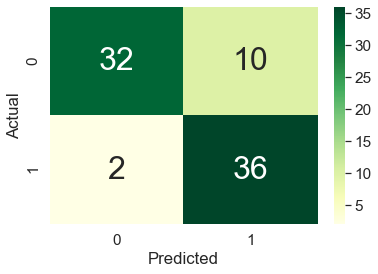

In [19]:
confusion = metrics.confusion_matrix(Y_test, predictions_test)
confusion_df = pd.DataFrame(confusion, range(2), range(2))
confusion_df.index.name = 'Actual'
confusion_df.columns.name = 'Predicted'
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_df,cmap="YlGn", annot=True, annot_kws={"size": 32})

plt.show()

The new threshold decreased the False negatives, but on the other hand,
it increased the false positives. Additionally, it reduced the error by 4 observations.
this is trivial and could be attributed to luck. We would not be able to tell if this new 
cutoff value is better without testing it on more data. The more data we test the thresholds on, 
the better we can tell the difference between them.

## Conclusion
Binary logistic regression is an algorithm that discriminates between two categories. The response is
modeled as a probability as opposed to linear regression's continuous response. It is a generalized linear model, meaning that it draws a linear decision boundary and is best
applied to linearly separable data. It assumes a bernoulli distribution for the response
and it tries to maximize the likelihood function in order for it to find the model parameters.
Unfortunately, we cannot find a closed for for the parameters due to the non-linearity
of the log-likelihood and sigmoid functions. We use gradient based approximation algorithms such as
gradient ascent, or newton-raphson to approximate the parameters.